In [1]:
import pandas as pd
import datetime as dt
%matplotlib inline
from pylab import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('covid_19_india.csv')

In [3]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [4]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
9286,9287,09/12/20,8:00 AM,Telengana,-,-,266120,1480,275261
9287,9288,09/12/20,8:00 AM,Tripura,-,-,32169,373,32945
9288,9289,09/12/20,8:00 AM,Uttarakhand,-,-,72435,1307,79141
9289,9290,09/12/20,8:00 AM,Uttar Pradesh,-,-,528832,7967,558173
9290,9291,09/12/20,8:00 AM,West Bengal,-,-,475425,8820,507995


In [5]:
df = pd.read_csv('covid_19_india.csv', parse_dates = ['Date'])

In [6]:
df = df.rename(columns={'State/UnionTerritory':'State_UT'})

In [7]:
df.drop('Sno', axis=1, inplace=True)
df.head()

,Date,Time,State_UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,2020-01-02,6:00 PM,Kerala,2,0,0,0,2
3,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,2020-03-02,6:00 PM,Kerala,3,0,0,0,3


In [8]:
df.drop('Time', axis=1, inplace=True)
df.head()

,Date,State_UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,1,0,0,0,1
1,2020-01-31,Kerala,1,0,0,0,1
2,2020-01-02,Kerala,2,0,0,0,2
3,2020-02-02,Kerala,3,0,0,0,3
4,2020-03-02,Kerala,3,0,0,0,3


In [9]:
df.shape

(9291, 7)

In [10]:
df.columns

Index(['Date', 'State_UT', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths', 'Confirmed'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9291 entries, 0 to 9290
Data columns (total 7 columns):
Date                        9291 non-null datetime64[ns]
State_UT                    9291 non-null object
ConfirmedIndianNational     9291 non-null object
ConfirmedForeignNational    9291 non-null object
Cured                       9291 non-null int64
Deaths                      9291 non-null int64
Confirmed                   9291 non-null int64
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 508.2+ KB


In [81]:
df.tail()

,Date,State_UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
9286,2020-09-12,Telengana,-,-,266120,1480,275261
9287,2020-09-12,Tripura,-,-,32169,373,32945
9288,2020-09-12,Uttarakhand,-,-,72435,1307,79141
9289,2020-09-12,Uttar Pradesh,-,-,528832,7967,558173
9290,2020-09-12,West Bengal,-,-,475425,8820,507995


In [13]:
df.isnull().mean()

Date                        0.0
State_UT                    0.0
ConfirmedIndianNational     0.0
ConfirmedForeignNational    0.0
Cured                       0.0
Deaths                      0.0
Confirmed                   0.0
dtype: float64

In [14]:
last_day = df[df.Date == '2020-09-12']

In [15]:
last_day.head()

,Date,State_UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
9256,2020-09-12,Andaman and Nicobar Islands,-,-,4647,61,4778
9257,2020-09-12,Andhra Pradesh,-,-,860368,7042,872839
9258,2020-09-12,Arunachal Pradesh,-,-,15690,55,16437
9259,2020-09-12,Assam,-,-,209447,997,214019
9260,2020-09-12,Bihar,-,-,232563,1300,239322


In [83]:
last_day.shape

(35, 5)

In [16]:
last_day = last_day[['Date', 'State_UT','Cured','Deaths', 'Confirmed']]

In [17]:
last_day.head()

,Date,State_UT,Cured,Deaths,Confirmed
9256,2020-09-12,Andaman and Nicobar Islands,4647,61,4778
9257,2020-09-12,Andhra Pradesh,860368,7042,872839
9258,2020-09-12,Arunachal Pradesh,15690,55,16437
9259,2020-09-12,Assam,209447,997,214019
9260,2020-09-12,Bihar,232563,1300,239322


In [18]:
max_cured_cases_on_last_day = last_day.sort_values(by='Cured', ascending=False)

In [19]:
max_cured_cases_on_last_day.head()

,Date,State_UT,Cured,Deaths,Confirmed
9275,2020-09-12,Maharashtra,1737080,47827,1859367
9257,2020-09-12,Andhra Pradesh,860368,7042,872839
9271,2020-09-12,Karnataka,858370,11880,895284
9285,2020-09-12,Tamil Nadu,770378,11822,792788
9272,2020-09-12,Kerala,582351,2472,644696


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
top_10_cured_states = max_cured_cases_on_last_day[0:10]

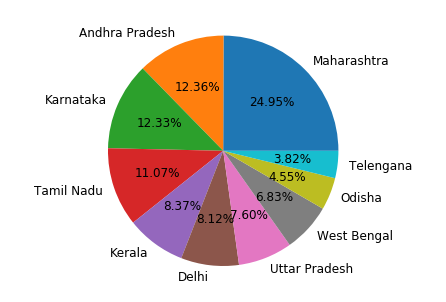

In [22]:
X = top_10_cured_states.State_UT
Y = top_10_cured_states.Cured
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(Y, labels = X, autopct= '%1.2f%%',textprops={'fontsize': 12})

plt.show()

In [23]:
max_confirmed_cases_on_last_day = last_day.sort_values(by = 'Confirmed', ascending=False)

In [24]:
max_confirmed_cases_on_last_day.head()

,Date,State_UT,Cured,Deaths,Confirmed
9275,2020-09-12,Maharashtra,1737080,47827,1859367
9271,2020-09-12,Karnataka,858370,11880,895284
9257,2020-09-12,Andhra Pradesh,860368,7042,872839
9285,2020-09-12,Tamil Nadu,770378,11822,792788
9272,2020-09-12,Kerala,582351,2472,644696


In [25]:
top_10_confirmed_states = max_confirmed_cases_on_last_day[0:10]

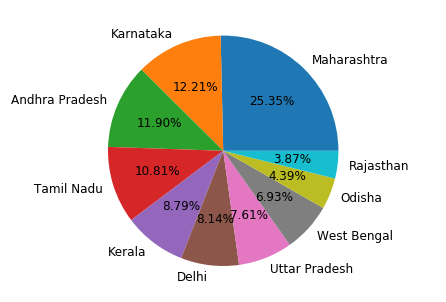

In [27]:
X = top_10_confirmed_states.State_UT
Y = top_10_confirmed_states.Confirmed
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(Y, labels = X, autopct= '%1.2f%%',textprops={'fontsize': 12})
plt.show()

In [28]:
min_deaths_on_last_day = last_day.sort_values(by = 'Deaths')
min_deaths_on_last_day.head()

,Date,State_UT,Cured,Deaths,Confirmed
9263,2020-09-12,Dadra and Nagar Haveli and Daman and Diu,3330,2,3351
9278,2020-09-12,Mizoram,3772,6,3977
9258,2020-09-12,Arunachal Pradesh,15690,55,16437
9256,2020-09-12,Andaman and Nicobar Islands,4647,61,4778
9279,2020-09-12,Nagaland,10781,67,11479


In [29]:
bottom_10_states = min_deaths_on_last_day[0:10]

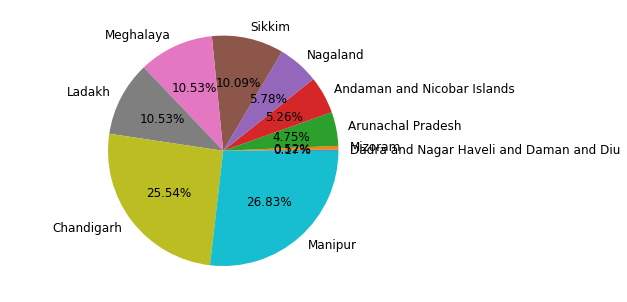

In [30]:
X = bottom_10_states.State_UT
Y = bottom_10_states.Deaths
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(Y, labels = X, autopct= '%1.2f%%',textprops={'fontsize': 12})
plt.show()

In [31]:
last_day_df = last_day.sort_values(by = ['Cured', 'Deaths','Confirmed'], ascending= ['False', 'True', 'False'])
last_day_df.head()

,Date,State_UT,Cured,Deaths,Confirmed
9263,2020-09-12,Dadra and Nagar Haveli and Daman and Diu,3330,2,3351
9278,2020-09-12,Mizoram,3772,6,3977
9256,2020-09-12,Andaman and Nicobar Islands,4647,61,4778
9284,2020-09-12,Sikkim,4735,117,5215
9273,2020-09-12,Ladakh,8056,122,8969


In [32]:
first_day = df[df.Date == '2020-01-30']

In [33]:
first_day.head()

,Date,State_UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,1,0,0,0,1


In [34]:
karnataka = df[df.State_UT == 'Karnataka']

In [35]:
karnataka.head()

,Date,State_UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
74,2020-09-03,Karnataka,1,0,0,0,1
89,2020-10-03,Karnataka,4,0,0,0,4
108,2020-11-03,Karnataka,4,0,0,0,4
119,2020-12-03,Karnataka,4,0,0,0,4
132,2020-03-13,Karnataka,6,0,0,1,6


In [36]:
karnataka.shape

(276, 7)

In [37]:
last_5_days_kar = karnataka[270:276]

In [38]:
last_5_days_kar

,Date,State_UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
9096,2020-04-12,Karnataka,-,-,852584,11821,889113
9131,2020-05-12,Karnataka,-,-,853461,11834,890360
9166,2020-06-12,Karnataka,-,-,854861,11846,891685
9201,2020-07-12,Karnataka,-,-,855750,11856,893006
9236,2020-08-12,Karnataka,-,-,857351,11867,894004
9271,2020-09-12,Karnataka,-,-,858370,11880,895284


In [39]:
## Visualising death cases in karnataka for the last 10 days

C:\Users\Rashika\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


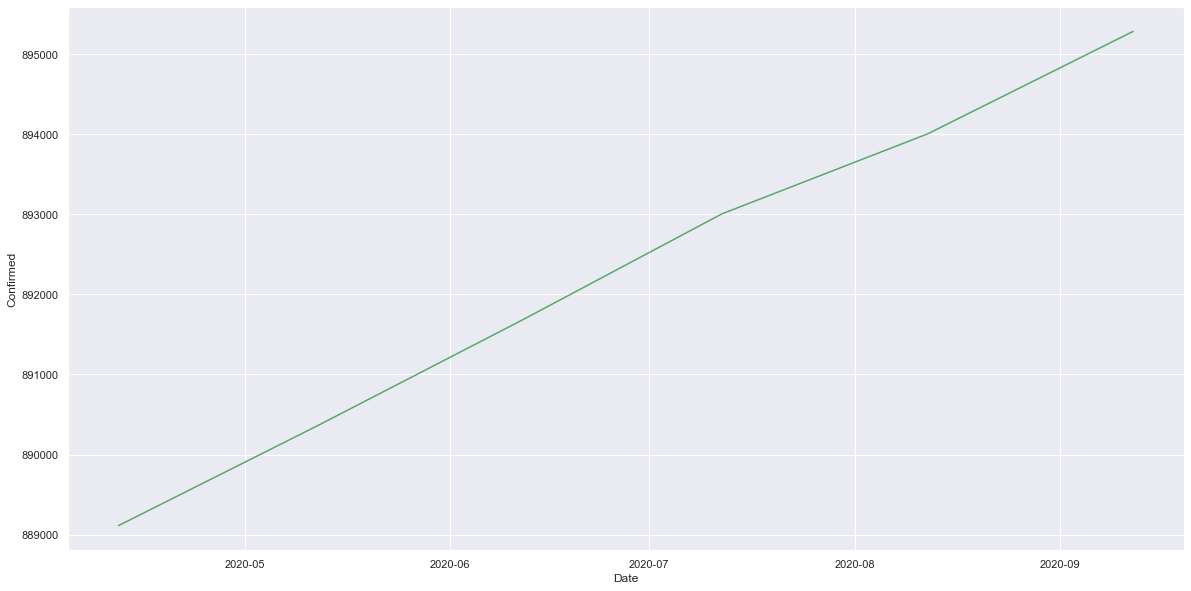

In [40]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x="Date",y="Confirmed",data=last_5_days_kar,color="g")
plt.show()

In [41]:
## Visualizing cured cases in Karnataka for the last 10 days

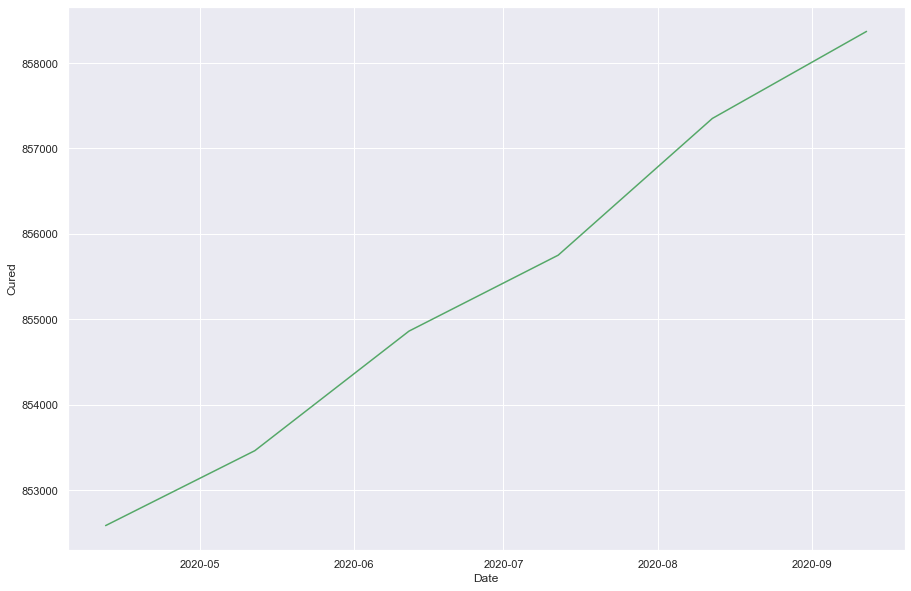

In [42]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Date",y="Cured",data=last_5_days_kar,color="g")
plt.show()

In [43]:
karnataka['Date']=karnataka['Date'].map(dt.datetime.toordinal)
karnataka.head()

# Pandas Timestamp.toordinal() function return proleptic Gregorian ordinal. January 1 of year 1 is day 1. Function return the ordinal value for the given Timestamp object.

C:\Users\Rashika\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,State_UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
74,737671,Karnataka,1,0,0,0,1
89,737701,Karnataka,4,0,0,0,4
108,737732,Karnataka,4,0,0,0,4
119,737762,Karnataka,4,0,0,0,4
132,737497,Karnataka,6,0,0,1,6


In [44]:
x=karnataka['Date']
y=karnataka['Confirmed']

In [45]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.25)

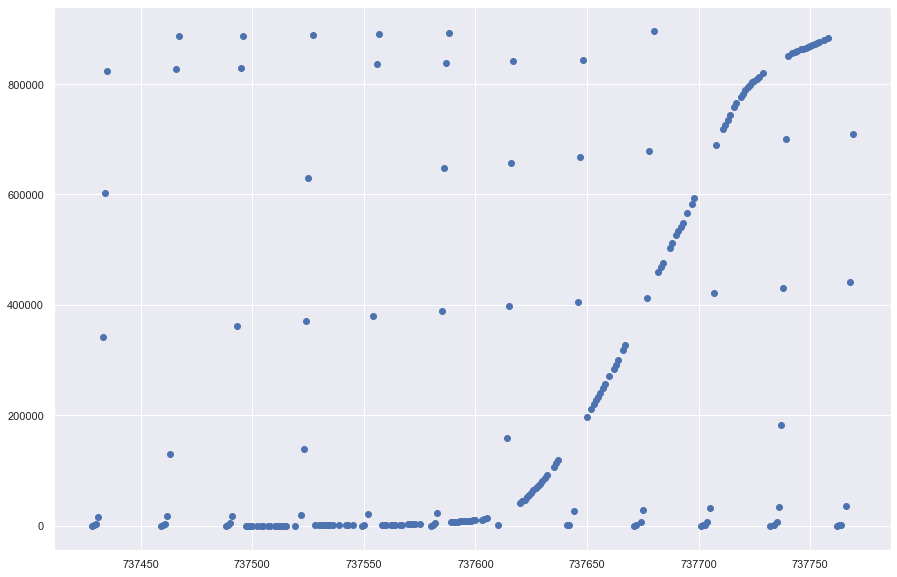

In [46]:
scatter(x_train,y_train)

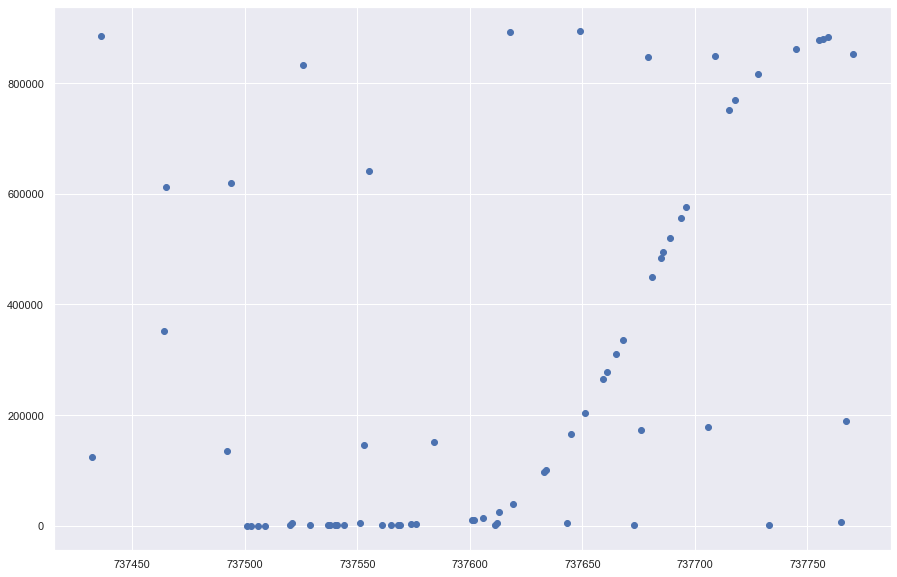

In [47]:
scatter(x_test,y_test)

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
karnataka.tail()

,Date,State_UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
9131,737557,Karnataka,-,-,853461,11834,890360
9166,737588,Karnataka,-,-,854861,11846,891685
9201,737618,Karnataka,-,-,855750,11856,893006
9236,737649,Karnataka,-,-,857351,11867,894004
9271,737680,Karnataka,-,-,858370,11880,895284


In [84]:
lr.predict(np.array([[737690]]))

array([[954970.17691326]])

In [51]:
maharastra = df[df.State_UT=='Maharashtra']

In [52]:
maharastra.head()

,Date,State_UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
76,2020-09-03,Maharashtra,2,0,0,0,2
91,2020-10-03,Maharashtra,5,0,0,0,5
97,2020-11-03,Maharashtra,2,0,0,0,2
120,2020-12-03,Maharashtra,11,0,0,0,11
133,2020-03-13,Maharashtra,14,0,0,0,14


In [53]:
maharastra.shape

(275, 7)

In [54]:
last_5_days_mah = maharastra[270:]

In [55]:
last_5_days_mah

,Date,State_UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
9135,2020-05-12,Maharashtra,-,-,1710050,47599,1842587
9170,2020-06-12,Maharashtra,-,-,1715884,47694,1847509
9205,2020-07-12,Maharashtra,-,-,1723370,47734,1852266
9240,2020-08-12,Maharashtra,-,-,1730715,47774,1855341
9275,2020-09-12,Maharashtra,-,-,1737080,47827,1859367


In [56]:
## Visualising death cases of last 10 days

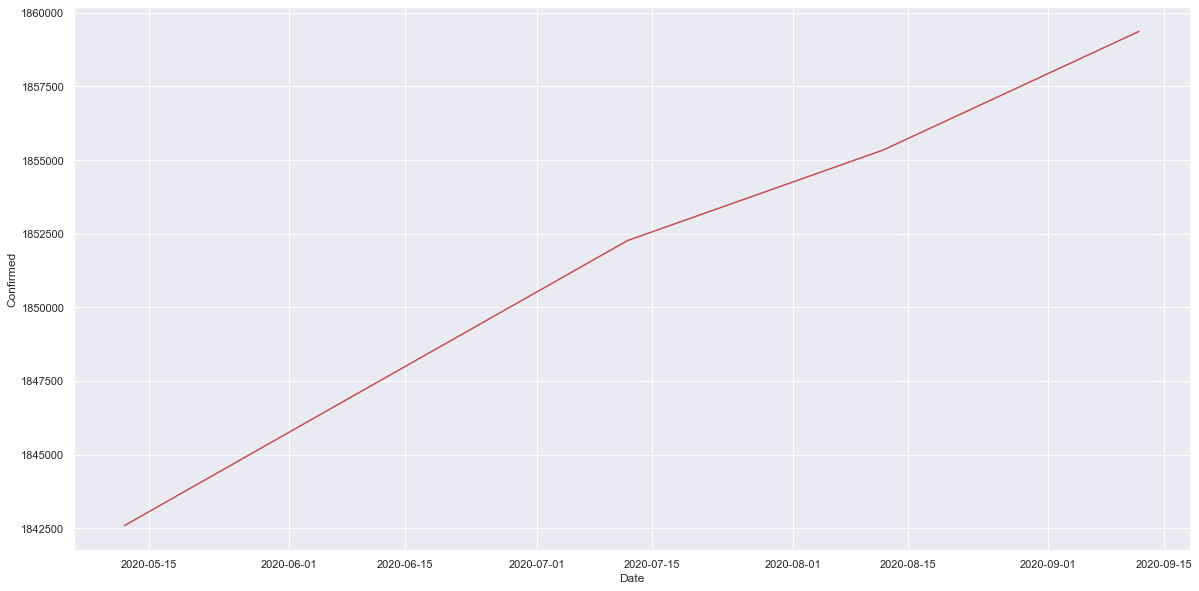

In [57]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x="Date",y="Confirmed",data=last_5_days_mah,color="r")
plt.show()

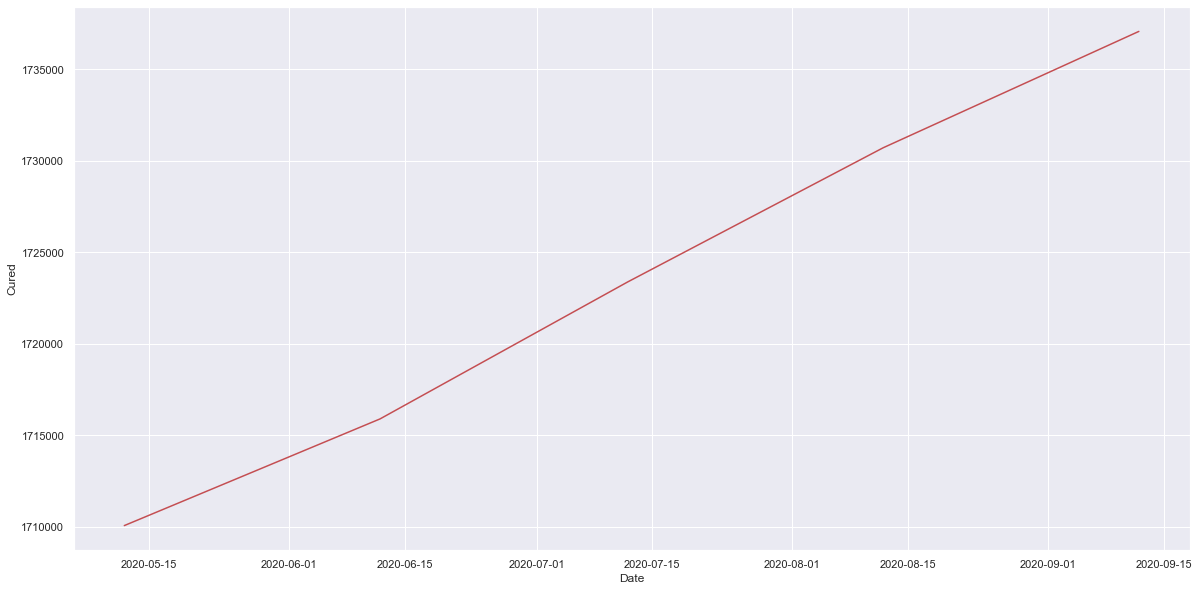

In [58]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x="Date",y="Cured",data=last_5_days_mah,color="r")
plt.show()

In [59]:
maharastra['Date']=maharastra['Date'].map(dt.datetime.toordinal)
maharastra.head()

C:\Users\Rashika\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,State_UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
76,737671,Maharashtra,2,0,0,0,2
91,737701,Maharashtra,5,0,0,0,5
97,737732,Maharashtra,2,0,0,0,2
120,737762,Maharashtra,11,0,0,0,11
133,737497,Maharashtra,14,0,0,0,14


In [60]:
x=maharastra['Date']
y=maharastra['Confirmed']

In [61]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.25)

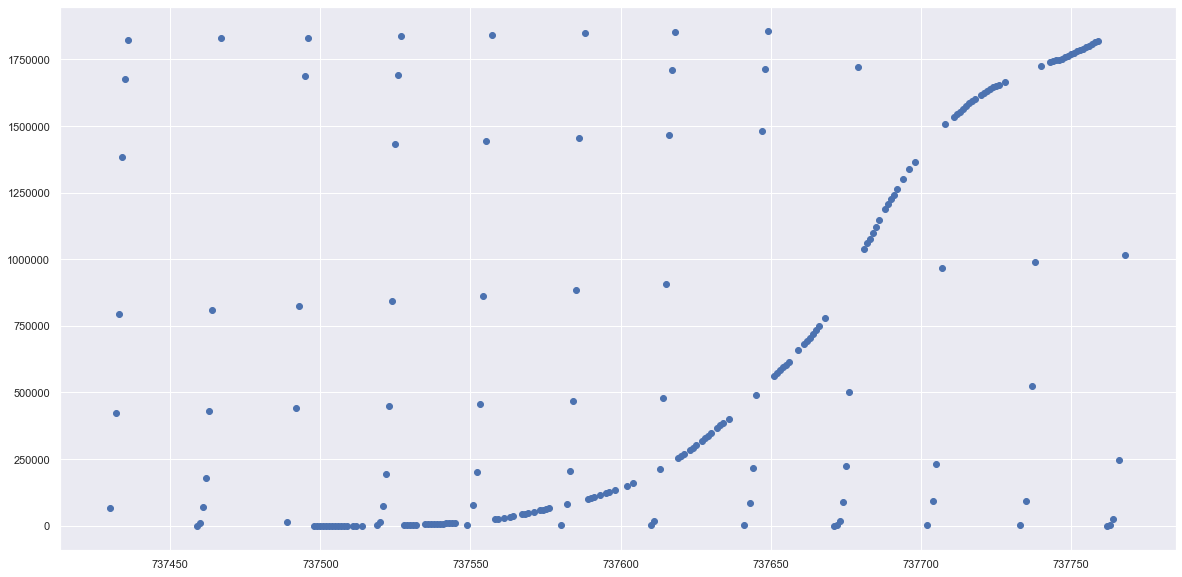

In [62]:
scatter(x_train,y_train)

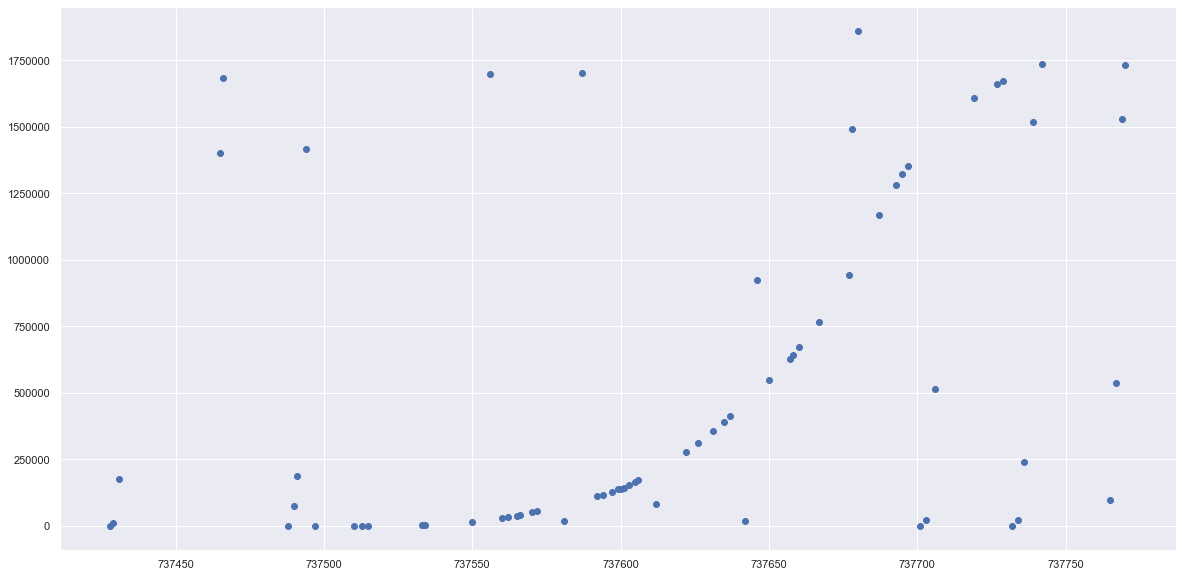

In [63]:
scatter(x_test,y_test)

In [64]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
maharastra.tail()

,Date,State_UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
9135,737557,Maharashtra,-,-,1710050,47599,1842587
9170,737588,Maharashtra,-,-,1715884,47694,1847509
9205,737618,Maharashtra,-,-,1723370,47734,1852266
9240,737649,Maharashtra,-,-,1730715,47774,1855341
9275,737680,Maharashtra,-,-,1737080,47827,1859367


In [66]:
lr.predict(np.array([[737690]]))

array([[954970.17691326]])

In [67]:
state_df = pd.read_csv('StatewiseTestingDetails.csv', parse_dates = ['Date'])

In [68]:
state_df.tail()

,Date,State,TotalSamples,Negative,Positive
8061,2020-12-04,West Bengal,6047279.0,NaN,NaN
8062,2020-12-05,West Bengal,6091668.0,NaN,NaN
8063,2020-12-06,West Bengal,6135854.0,NaN,NaN
8064,2020-12-07,West Bengal,6167307.0,NaN,NaN
8065,2020-12-08,West Bengal,6211537.0,NaN,NaN


In [69]:
state_df.shape

(8066, 5)

In [70]:
latest_test_data =  state_df[state_df.Date == '2020-12-08']

In [71]:
latest_test_data.head()

,Date,State,TotalSamples,Negative,Positive
450,2020-12-08,Andhra Pradesh,10509805.0,NaN,NaN
904,2020-12-08,Assam,5510027.0,NaN,NaN
1148,2020-12-08,Bihar,15664718.0,NaN,NaN
1389,2020-12-08,Chandigarh,154396.0,135138,NaN
1626,2020-12-08,Chhattisgarh,2828098.0,NaN,NaN


In [72]:
max_positive_cases = latest_test_data.sort_values(by = 'Positive', ascending = False)

In [73]:
max_positive_cases.head()

,Date,State,TotalSamples,Negative,Positive
3994,2020-12-08,Kerala,6702885.0,NaN,644698.0
3496,2020-12-08,Jharkhand,4382789.0,4272150,110639.0
5974,2020-12-08,Puducherry,425700.0,384043,41562.0
7326,2020-12-08,Tripura,543721.0,510799,32922.0
450,2020-12-08,Andhra Pradesh,10509805.0,NaN,NaN


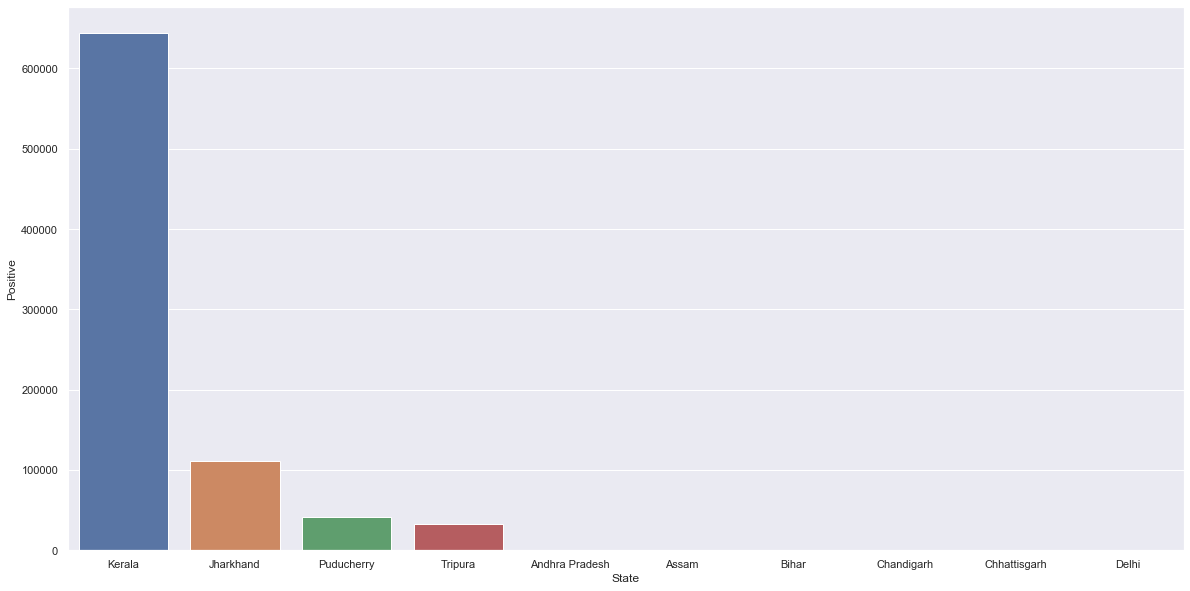

In [74]:
sns.barplot(x= 'State', y='Positive', data = max_positive_cases[0:10])

In [75]:
max_test_cases = latest_test_data.sort_values(by = 'TotalSamples', ascending = False)

In [76]:
max_test_cases.head()

,Date,State,TotalSamples,Negative,Positive
7571,2020-12-08,Uttar Pradesh,20621452.0,NaN,NaN
1148,2020-12-08,Bihar,15664718.0,NaN,NaN
6923,2020-12-08,Tamil Nadu,12605289.0,NaN,NaN
3742,2020-12-08,Karnataka,11878413.0,NaN,NaN
4640,2020-12-08,Maharashtra,11377074.0,NaN,NaN


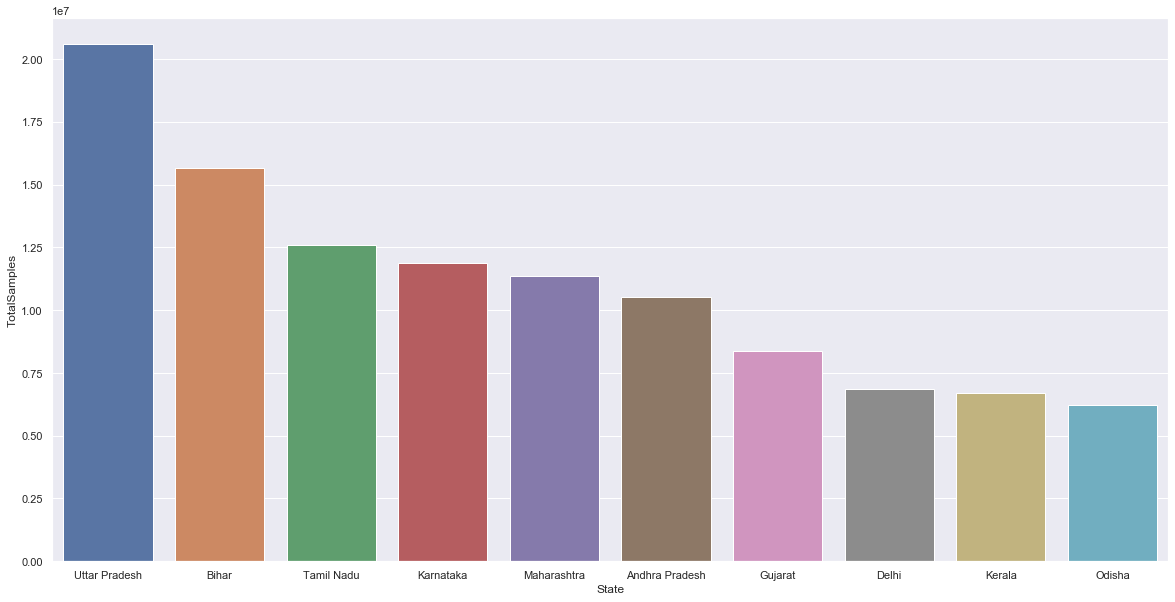

In [77]:
sns.barplot(x= 'State', y='TotalSamples', data = max_test_cases[0:10])

In [78]:
max_negative_cases = latest_test_data.sort_values(by = 'Negative', ascending = False)

In [79]:
max_negative_cases.head()

,Date,State,TotalSamples,Negative,Positive
3012,2020-12-08,Himachal Pradesh,584624.0,536467,NaN
7326,2020-12-08,Tripura,543721.0,510799,32922.0
6467,2020-12-08,Rajasthan,4664755.0,4376876,NaN
3496,2020-12-08,Jharkhand,4382789.0,4272150,110639.0
5974,2020-12-08,Puducherry,425700.0,384043,41562.0


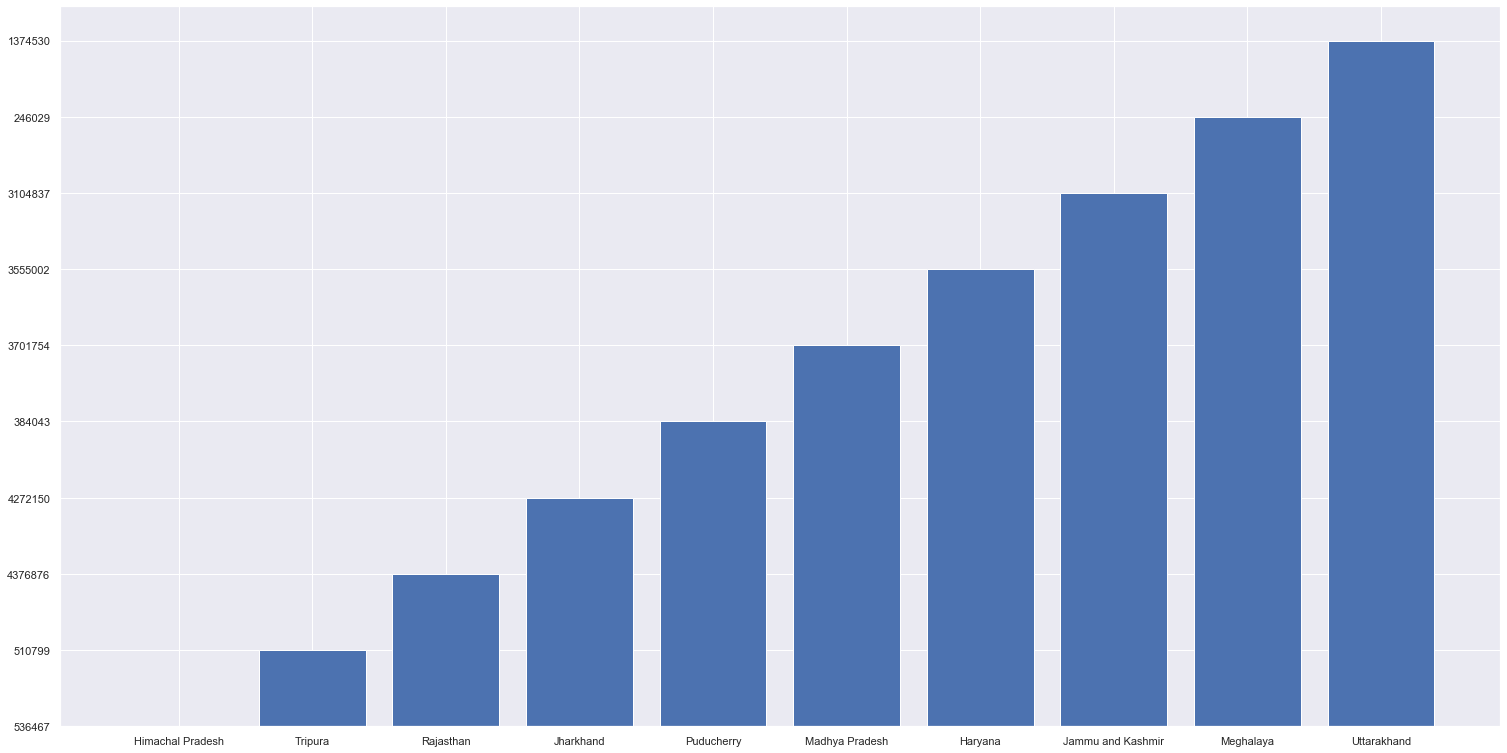

In [80]:
X=max_negative_cases.State[0:10]
Y=max_negative_cases.Negative[0:10]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X,Y)
plt.show()